In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import glob

In [3]:
avglist0 = glob.glob('AVGoutput_param0_masstestpal_*')
varlist0 = glob.glob('VARoutput_param0_masstestpal_*')
avglist1 = glob.glob('AVGoutput_param1_masstestpal_*')
varlist1 = glob.glob('VARoutput_param1_masstestpal_*')
avglist7 = glob.glob('AVGoutput_param7_masstestpal_*')
varlist7 = glob.glob('VARoutput_param7_masstestpal_*')
avglist8 = glob.glob('AVGoutput_param8_masstestpal_*')
varlist8 = glob.glob('VARoutput_param8_masstestpal_*')
#print sorted(avglist)
#print sorted(varlist)

In [4]:
np_avgs0 = []
np_vars0 = []
np_avgs1 = []
np_vars1 = []
np_avgs7 = []
np_vars7 = []
np_avgs8 = []
np_vars8 = []
for i in range(len(avglist0)):
    np_avgs0.append(np.load(sorted(avglist0)[i]))
    np_vars0.append(np.load(sorted(varlist0)[i]))
    np_avgs1.append(np.load(sorted(avglist1)[i]))
    np_vars1.append(np.load(sorted(varlist1)[i]))
    np_avgs7.append(np.load(sorted(avglist7)[i]))
    np_vars7.append(np.load(sorted(varlist7)[i]))
    np_avgs8.append(np.load(sorted(avglist8)[i]))
    np_vars8.append(np.load(sorted(varlist8)[i]))

In [5]:
#print sorted(avglist)

In [6]:
def plot_single_histo(avg_list, var_list, true_value):
    fig = plt.figure(figsize=(10,6))
    n, bins, patches = plt.hist(avg_list, 30, facecolor='green', alpha=1.)
    plt.axvline(x=true_value, color='red')
    STD = np.sqrt(np.average(var_list))
    plt.errorbar(x=true_value, y=2, xerr=STD)
    plt.axvline(x=np.median(avg_list), color='blue')
    plt.axvline(x=np.average(avg_list), color='yellow')
    plt.grid()
    plt.xlabel('Average Param')
    plt.ylabel('Frequency')
    print (true_value - np.average(avg_list))/true_value
    plt.show()
    
def plot_avg_vs_var(avg_list, var_list, true_value, axis_scale):
    fig = plt.figure(figsize=(10,6))
    std = np.sqrt(var_list)
    plt.axvline(x=true_value, color='red')
    plt.scatter(avg_list, std)
    plt.xlim(np.amin(avg_list)*(1-axis_scale), np.amax(avg_list)*(1+axis_scale))
    plt.ylim(np.amin(std)*(1-axis_scale), np.amax(std)*(1+axis_scale))
    plt.grid()
    plt.xlabel('Average Param')
    plt.ylabel('STD')
    plt.show()
    
def to_eioo_coord(params):
    inner1 = np.sqrt(((params[4]*params[4])+(params[3]*params[3]))/4.)
    inner2 = np.sqrt(((params[4+7]*params[4+7])+(params[3+7]*params[3+7]))/4.)
    inner1, inner2 = np.clip(inner1, -1., 1.), np.clip(inner2, -1., 1.) 
    i1 = 2.*np.arcsin(inner1)*(180./np.pi)
    Ome1 = np.arctan2(params[4], params[3])*(180./np.pi)
    i2 = 2.*np.arcsin(inner2)*(180./np.pi)
    Ome2 = np.arctan2(params[4+7], params[3+7])*(180./np.pi)    
    params[3], params[4], params[3+7], params[4+7] = i1, Ome1, i2, Ome2
    
    e1 = np.sqrt(params[2]*params[2] + params[5]*params[5])
    ome1 = np.arctan2(params[5], params[2])*(180./np.pi) - Ome1
    e2 = np.sqrt(params[2+7]*params[2+7] + params[5+7]*params[5+7])
    ome2 = np.arctan2(params[5+7], params[2+7])*(180./np.pi) - Ome2
    params[2], params[5], params[2+7], params[5+7],  = e1, ome1, e2, ome2

    
def to_pal_coord(p1te, p2te):
    ix1 = 2*np.sin((np.pi/180.)*p1te[3]/2.)*np.cos(p1te[4]*(np.pi/180.))
    iy1 = 2*np.sin((np.pi/180.)*p1te[3]/2.)*np.sin(p1te[4]*(np.pi/180.))
    ix2 = 2*np.sin((np.pi/180.)*p2te[3]/2.)*np.cos(p2te[4]*(np.pi/180.))
    iy2 = 2*np.sin((np.pi/180.)*p2te[3]/2.)*np.sin(p2te[4]*(np.pi/180.))
    k1 = p1te[2] * np.cos(p1te[4]*(np.pi/180.) + p1te[5]*(np.pi/180.))
    h1 = p1te[2] * np.sin(p1te[4]*(np.pi/180.) + p1te[5]*(np.pi/180.))
    k2 = p2te[2] * np.cos(p2te[4]*(np.pi/180.) + p2te[5]*(np.pi/180.))
    h2 = p2te[2] * np.sin(p2te[4]*(np.pi/180.) + p2te[5]*(np.pi/180.))
    p1te[3], p1te[4] = ix1, iy1
    p2te[3], p2te[4] = ix2, iy2
    p1te[2], p1te[5] = k1, h1
    p2te[2], p2te[5] = k2, h2
    
#True values    
p1 = [0.00002878248, 1.0917340278625494e+01, 5.6159310042858110e-02, 9.0921164935951211e+01, -1.1729336712101943e-18, 1.8094838714599581e+02, -8.7093652691581923e+01]
p2 = [0.00061895914, 2.2266898036209028e+01, 5.6691301931178648e-02, 8.7598285693573246e+01, 4.6220554014026838e-01, 1.6437004273382669e+00, -1.9584857031843157e+01]
pa1 = [0.00002878248, 1.0917340278625494e+01, 5.6159310042858110e-02, 9.0921164935951211e+01, -1.1729336712101943e-18, 1.8094838714599581e+02, -8.7093652691581923e+01]
pa2 = [0.00061895914, 2.2266898036209028e+01, 5.6691301931178648e-02, 8.7598285693573246e+01, 4.6220554014026838e-01, 1.6437004273382669e+00, -1.9584857031843157e+01]
to_pal_coord(pa1, pa2)


0.0123259746114


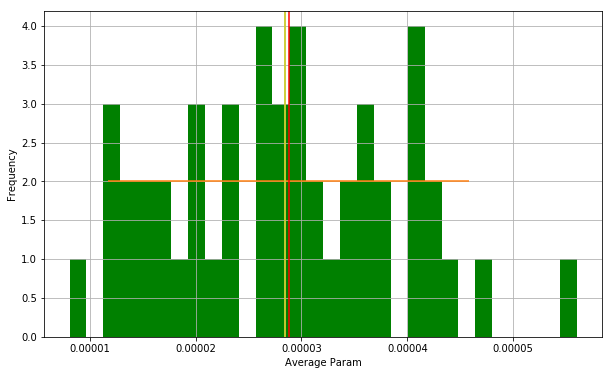

In [7]:
plot_single_histo(np_avgs0, np_vars0, p1[0])

-8.85444429129e-05


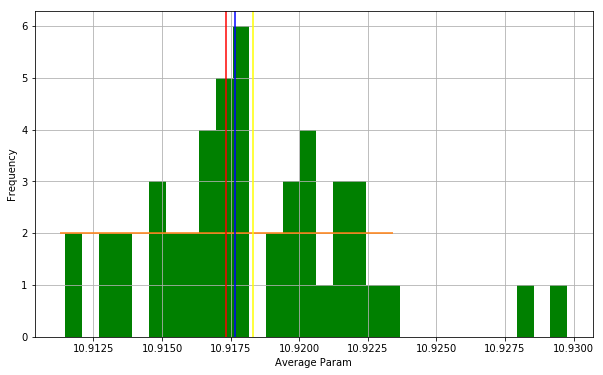

In [8]:
plot_single_histo(np_avgs1, np_vars1, p1[1])

-0.0944908674397


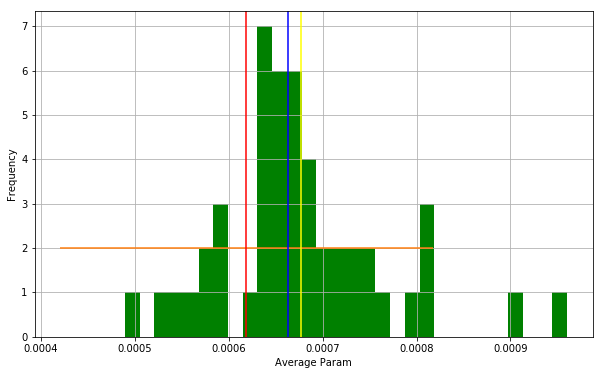

In [9]:
plot_single_histo(np_avgs7, np_vars7, p2[0])

2.9442795061e-05


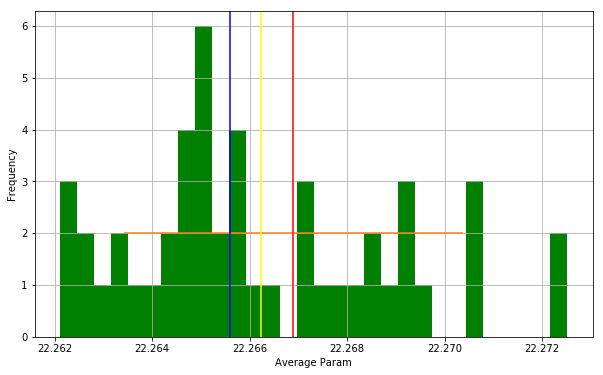

In [10]:
plot_single_histo(np_avgs8, np_vars8, p2[1])

In [11]:
#plot_avg_vs_var(np_avgs[0], np_vars[0], p1[0], 0.05)
plot_avg_vs_var(np_avgs[1], np_vars[1], p1[0], 0.05)

NameError: name 'np_avgs' is not defined

In [ ]:
#plot_avg_vs_var(np_avgs[2], np_vars[2], p1[1], 0.00005)
plot_avg_vs_var(np_avgs[3], np_vars[3], p1[1], 0.00005)

In [ ]:
#plot_avg_vs_var(np_avgs[4], np_vars[4], p2[0], 0.005)
plot_avg_vs_var(np_avgs[5], np_vars[5], p2[0], 0.005)

In [ ]:
#plot_avg_vs_var(np_avgs[6], np_vars[6], p2[1], 0.000005)
plot_avg_vs_var(np_avgs[7], np_vars[7], p2[1], 0.000005)

In [1]:
import os
cwd = os.getcwd()
print cwd

/Users/reboundmacbook/Documents/ttvmassbias_messy_newln_pri
